## 0822再更新
確認三件事情
1. Percolation Threshold的找法必須是first significant gap
2. 確認筱雯的模擬值跟我一樣
3. 自己寫一個理論值計算的方式

## 0822更新
做一下$t$-test以確認「生成100張圖各跑1次SIC」和「生成1張圖跑100次SIC」是否在統計上有顯著差異，以$q=0.4,\delta=0.302$來做檢驗

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [2]:
df1 = pd.read_csv('../results/d3G3/0.2/delta=0.3.csv',
                  names = ['ad_limit', '2', '3', '4', '5', '6', '7', '8', 'gamma'], 
                  engine='python')
df2 = pd.read_csv('./q=0.2delta=0.3.csv',
                  names = ['ad_limit', 'gamma', '1', '2'], 
                  engine='python')

In [3]:
a1 = df1['ad_limit']
a2 = df2['ad_limit']
y1 = df1['gamma']
y2 = df2['gamma']

In [4]:
ttest_ind(a1, a2, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-0.41232864448526285, pvalue=0.6806075545950514)

In [5]:
ttest_ind(y1, y2, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=0.6819138341022777, pvalue=0.4962129204639072)

In [6]:
print(np.mean(a1), np.mean(a2), np.mean(y1), np.mean(y2))

0.12429956157347308 0.12447365356383383 0.7756221296296285 0.7749009259259256


## 0820 更新
1. 反正跑code最多花四小時，不妨直接把理論值threshold前後10個點一次跑完，不必費心力作binary search，meeting前跑100個點都不是問題
2. 請筱雯做數個.csv檔案，每一組$(d,G,\lim_{i\to\infty}\alpha_d^{(i)}\text{或}\lim_{i\to\infty}\gamma^{(i)})$為一組。每一行代表不同$q$值，每一列代表$\delta$不同時的理論值
如：$(d,G)=3$時，需兩個.csv檔案，分別記錄$\alpha_d^{(i)}\text{以及}\lim_{i\to\infty}\gamma^{(i)}$。至於需要取值在哪些$\delta$，請學姊決定

## 0818更新
1. 對面實驗室更新了decoder,現在理論值和模擬值對的上了
2. 模擬所用的圖是我們的圖,故我們的程式不可能有問題
3. 張老師說生成一張圖,bootstrap 1000次

## 今天和張老師meeting後的結論
1. 取$d=3,G=3,N=18000$時，用對面實驗室的decoder進行模擬

    (1) $q=0$時，percolation threshold為0.274，而理論值為0.274，兩者相符
    
    (2) $q=0.3$時，percolation threshold為0.22，而理論值為0.297，兩者不相符
    
    (3) $q=0.4$時，percolation threshold小於0.2(他們MATLAB的程式跑不動)，而理論值為0.303，兩者不相符
    
    (4) $N$必須取夠大才會符合tree assumption，percolation threshold較不會有誤差
    
2. 我們生negative correlation的圖是沒有問題的。證據：
    (1) 昨天統計的條件機率對的上
    (2) 用我們生成的圖($q=0$)給對面實驗室的decoder跑，理論與模擬之percolation threshold相同
3. 對面解SIC的decoder也是沒問題的，但我們的decoder可能有
4. 綜合以上所述，雖然張老師寄了新版本的論文給我們，但他認為Density evolution的理論推導有問題

In [7]:
import numpy as np
import matplotlib.pyplot as plt

以下程式計算$q=0$時的percolation threshold。此時
$$p_X(x)=\frac{1}{3}\text{ if }x=6\text{ or }\frac{1}{2}\text{ if }x=3$$
$$p_Y(y)=\frac{1}{3}\text{ if }y=18\text{ or }\frac{1}{2}\text{ if }y=9$$
$$\lambda_X(x)=\frac{1}{2}z^2+\frac{1}{2}z^5$$
$$\lambda_Y(y)=\frac{1}{2}z^8+\frac{1}{2}z^{17}$$

In [2]:
def excess_x(z):
    return (1/2)*np.power(z,2) + (1/2)*np.power(z,5)

def excess_y(z):
    return (1/2)*np.power(z,8) + (1/2)*np.power(z,17)

In [10]:
delta = [0.27, 0.271, 0.272, 0.273, 0.274, 0.275, 0.276, 0.277, 0.278, 0.279, 0.28]
th = []

for d in delta:
    alpha = [d]
    for i in range(0,1000):
        alpha.append(d * excess_x(1-excess_y(1-alpha[i])))
    th.append(alpha[-1])

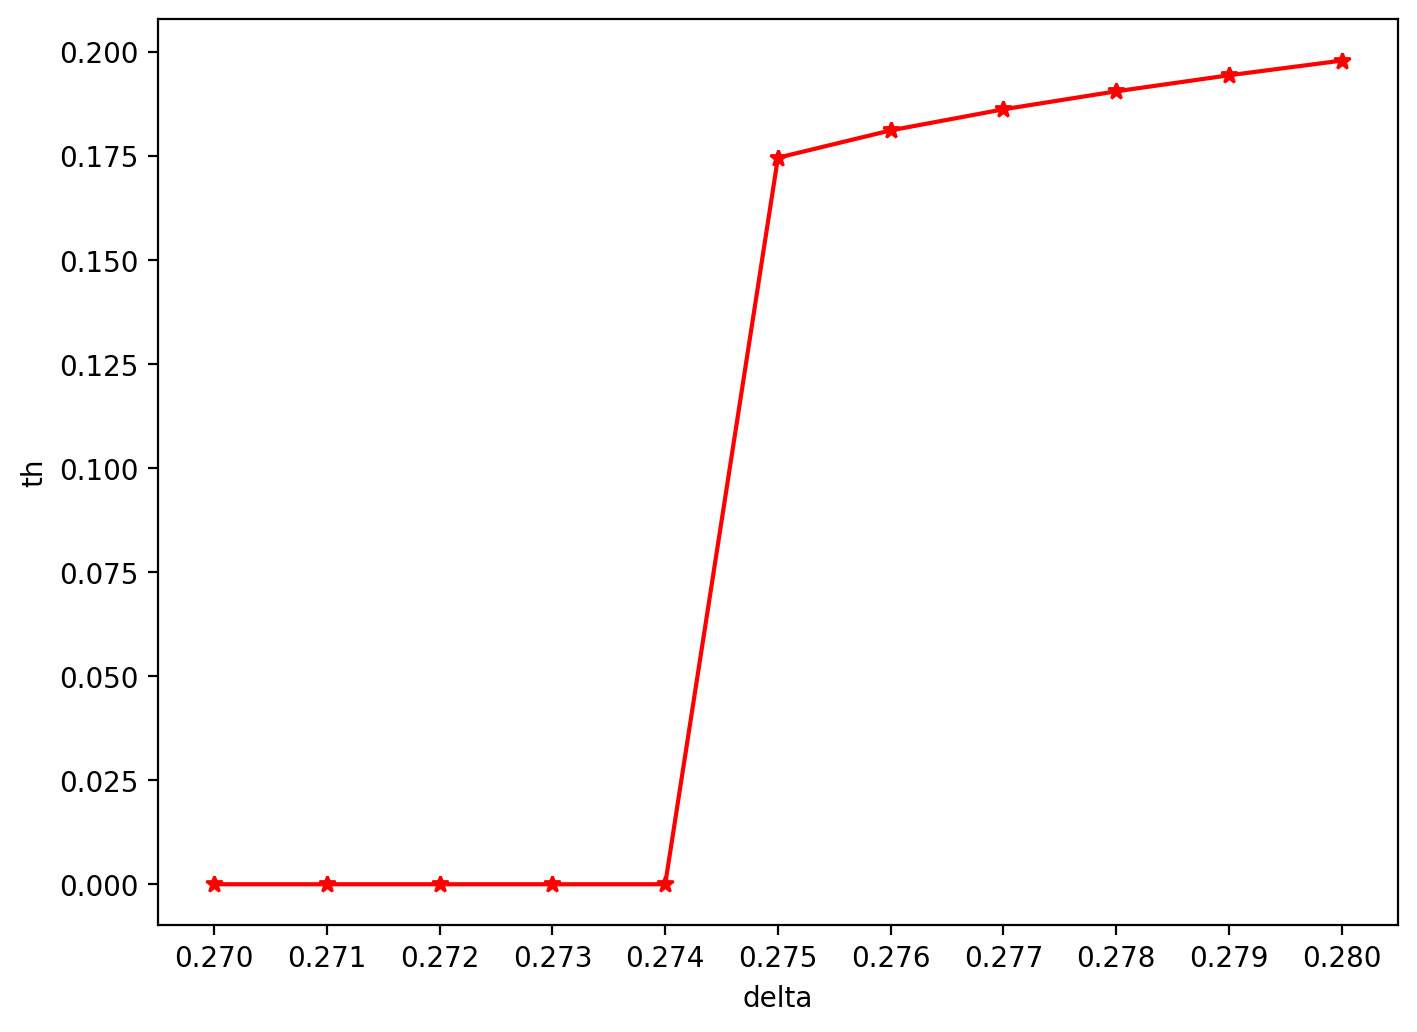

In [12]:
fig = plt.figure(figsize=(8,6), dpi=200)
plt.xticks(delta)
plt.plot(delta, th, '-*', color = 'red')
plt.xlabel("delta")
plt.ylabel("th")
plt.show()